In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import os

## Atom and Lattice

In [2]:
from Lattice import Atom
from Lattice import Lattice

print("Class Atom:")
print(Atom.__doc__)

print("Class Lattice:")
print(Lattice.__doc__)

Class Atom:

    Arguments:
        index(int): the index of the atom
        ele(string): the chemical element of the atom, vaccuum by default
        position(float, len=3 vector): the position of the atom, origin by default
        neighbor(dict{distance(rounded float): [index(int)]}): a dictionary of neighboring atoms 
    
Class Lattice:

    Arguments:
        elements(string, iterable): a list of elements.
        positions(float, iterable): a list of positions.
        lattice_const(float): more like a scaling factor, not a vector.
        lattice_vector(3 by 3 np.array): lattice vectors of the supercell.
        r_max(float): radius cutoff for searching neighbors.
        cal_neighbor(bool): whether calculate the neighboring index of each atom.
    Attributes:
        Lattice.atom_list(Atom, list): a list of Atoms.
    


In [5]:
# Example:
elements = np.array(['Co', 'Ni'], dtype='<U17')
positions = np.array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , -0.57735027,  0.81649658]])
lattice_const = 4.3
lattice_vector = np.array([[ 0.5       , -0.8660254 ,  0.        ],
       [ 0.5       ,  0.8660254 ,  0.        ],
       [ 0.        ,  0.        ,  1.63299316]])
r_max = 2.5
lattice = Lattice(elements, positions, lattice_const=lattice_const, \
                  lattice_vector=lattice_vector, r_max=r_max,  cal_neighbor=True)
lattice.print_info()

Parameters of class Lattice
lattice_const: 4.3
lattice_vector: 
[[ 0.5        -0.8660254   0.        ]
 [ 0.5         0.8660254   0.        ]
 [ 0.          0.          1.63299316]]
n_atom: 2
r_max: 2.5
atom_list: [Atom_0: Co, Atom_1: Ni]


In [6]:
lattice.atom_list

[Atom_0: Co, Atom_1: Ni]

In [7]:
lattice.atom_list[0].__dict__

{'index': 0,
 'ele': 'Co',
 'position': array([0., 0., 0.]),
 'neighbor': {2.2360679774: [1, 1, 1, 1],
  1.7320508057: [0, 0, 0, 0],
  2.3804761402: [0, 0, 0, 0, 0, 0, 0, 0],
  2.2360679752: [1, 1, 1, 1],
  1.4142135622: [1, 1, 1, 1],
  1.9999999934: [0, 0, 0, 0],
  1.7320508047: [1, 1, 1, 1],
  1.9148542122: [0, 0, 0, 0, 0, 0, 0, 0],
  0.9999999967: [0, 0, 0, 0],
  2.4494897361: [1, 1],
  2.3804761361: [0, 0, 0, 0],
  0.9999999997: [1, 1],
  1.7320508: [0, 0],
  1.7320508064: [1, 1, 1, 1],
  1.9148542139: [0, 0, 0, 0],
  0.9999999979: [1, 1, 1, 1],
  1.7320508015: [1, 1, 1, 1],
  2.2360679662: [1, 1, 1, 1],
  2.4494897385: [1, 1, 1, 1],
  1.63299316: [0, 0],
  1.414213555: [1, 1],
  2.0: [0, 0],
  1.0: [0, 0],
  0.0: [0]}}

# GenPosition
Generate random configurations and save them as input files for LSMS calculations

In [8]:
import numpy as np
import os
from GenPosition import generate_random_position

print(generate_random_position.__doc__)


    Generate the position file and save it at file_postion.
    Example:
        1: generate_random_position(file_position)
            Defualt, 1 Vaccum atom cubic cell
        2: generate_random_position(file_position, positions=[[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]],                        lattice_vector=np.array([[1.0, 0.0, 0.0],[0.0, 1.0, 0.0],[0.0, 0.0, 1.0]]),                        ele_dict={'Mo':8, 'V':8}, n_repeat=[2, 2, 2])
            2 by 2 by 2 BCC cell, a total of 16 atoms, with 8 Mo and 8 V atoms.
        3: position_fcc = [[0,0,0],[0.5, 0.5, 0.0], [0.5, 0.0, 0.5], [0.0, 0.5, 0.5]]
           generate_random_position(file_position, positions = position_fcc,                         lattice_vector = np.array([[1.0, 0.0, 0.0],[0.0, 1.0, 0.0],[0.0, 0.0, 1.0]]),                        ele_dict={'Mo':16, 'V':16}, n_repeat=[2,2,2])
            2 by 2 by 2 FCC cell, a total of 32 atoms, with 16 Mo and 16 V atoms.
    


In [9]:
lattice_new = generate_random_position(positions=[[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]],\
                        lattice_vector=np.array([[1.0, 0.0, 0.0],[0.0, 1.0, 0.0],[0.0, 0.0, 1.0]]),\
                        ele_dict={'Mo':32, 'Nb':32, 'V':32, 'W':32}, n_repeat=[4, 4, 4], lattice_const=6.2)

Parameters of class Lattice
lattice_const: 6.2
lattice_vector: 
[[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]
n_atom: 128
r_max: 0.0
atom_list: [Atom_0: W, Atom_1: Nb, Atom_2: Mo, Atom_3: Nb, Atom_4: V, Atom_5: Nb, Atom_6: Nb, Atom_7: V, Atom_8: Nb, Atom_9: Nb, Atom_10: V, Atom_11: Nb, Atom_12: V, Atom_13: V, Atom_14: W, Atom_15: Mo, Atom_16: W, Atom_17: V, Atom_18: Mo, Atom_19: Nb, Atom_20: Mo, Atom_21: Nb, Atom_22: V, Atom_23: W, Atom_24: Nb, Atom_25: Mo, Atom_26: W, Atom_27: V, Atom_28: Mo, Atom_29: W, Atom_30: W, Atom_31: Nb, Atom_32: V, Atom_33: Nb, Atom_34: Nb, Atom_35: Mo, Atom_36: V, Atom_37: W, Atom_38: Nb, Atom_39: V, Atom_40: V, Atom_41: W, Atom_42: V, Atom_43: Nb, Atom_44: W, Atom_45: Nb, Atom_46: Mo, Atom_47: W, Atom_48: Mo, Atom_49: Mo, Atom_50: V, Atom_51: W, Atom_52: Nb, Atom_53: V, Atom_54: Nb, Atom_55: W, Atom_56: V, Atom_57: Nb, Atom_58: V, Atom_59: V, Atom_60: W, Atom_61: Mo, Atom_62: W, Atom_63: W, Atom_64: W, Atom_65: Nb, Atom_66: V, Atom_67: W, Atom_68: Mo, Atom_69: Mo, A

In [10]:
file_dat = os.path.join(os.getcwd(), "position.dat")
lattice_new.write_positions_LSMS2(file_dat)
with open("position.dat") as file:
    data = file.readlines()

for x in data:
    print(x,end = '')

#Lattice constant:
  6.200000000000
# Lattice vector:
  4.000000000000	  0.000000000000	  0.000000000000
  0.000000000000	  4.000000000000	  0.000000000000
  0.000000000000	  0.000000000000	  4.000000000000
# Number of medium atoms:	128
# Number of medium atom type:	4
W	  0.000000000000	  0.000000000000	  0.000000000000
Nb	  0.500000000000	  0.500000000000	  0.500000000000
Mo	  1.000000000000	  0.000000000000	  0.000000000000
Nb	  1.500000000000	  0.500000000000	  0.500000000000
V	  2.000000000000	  0.000000000000	  0.000000000000
Nb	  2.500000000000	  0.500000000000	  0.500000000000
Nb	  3.000000000000	  0.000000000000	  0.000000000000
V	  3.500000000000	  0.500000000000	  0.500000000000
Nb	  0.000000000000	  1.000000000000	  0.000000000000
Nb	  0.500000000000	  1.500000000000	  0.500000000000
V	  1.000000000000	  1.000000000000	  0.000000000000
Nb	  1.500000000000	  1.500000000000	  0.500000000000
V	  2.000000000000	  1.000000000000	  0.000000000000
V	  2.500000000000	  1.50000000000

Set the value of r_max to find the neighbors and print out the neighbors 

In [16]:
lattice_new.reset_r_max(2.0)
file_neighbor = "neighbors_tmp/neighbors.dat"
lattice_new.write_neighbors(file_neighbor)

# Output X data for EPI model

In [26]:
lattice_new.atom_list

[Atom_0: W,
 Atom_1: Nb,
 Atom_2: Mo,
 Atom_3: Nb,
 Atom_4: V,
 Atom_5: Nb,
 Atom_6: Nb,
 Atom_7: V,
 Atom_8: Nb,
 Atom_9: Nb,
 Atom_10: V,
 Atom_11: Nb,
 Atom_12: V,
 Atom_13: V,
 Atom_14: W,
 Atom_15: Mo,
 Atom_16: W,
 Atom_17: V,
 Atom_18: Mo,
 Atom_19: Nb,
 Atom_20: Mo,
 Atom_21: Nb,
 Atom_22: V,
 Atom_23: W,
 Atom_24: Nb,
 Atom_25: Mo,
 Atom_26: W,
 Atom_27: V,
 Atom_28: Mo,
 Atom_29: W,
 Atom_30: W,
 Atom_31: Nb,
 Atom_32: V,
 Atom_33: Nb,
 Atom_34: Nb,
 Atom_35: Mo,
 Atom_36: V,
 Atom_37: W,
 Atom_38: Nb,
 Atom_39: V,
 Atom_40: V,
 Atom_41: W,
 Atom_42: V,
 Atom_43: Nb,
 Atom_44: W,
 Atom_45: Nb,
 Atom_46: Mo,
 Atom_47: W,
 Atom_48: Mo,
 Atom_49: Mo,
 Atom_50: V,
 Atom_51: W,
 Atom_52: Nb,
 Atom_53: V,
 Atom_54: Nb,
 Atom_55: W,
 Atom_56: V,
 Atom_57: Nb,
 Atom_58: V,
 Atom_59: V,
 Atom_60: W,
 Atom_61: Mo,
 Atom_62: W,
 Atom_63: W,
 Atom_64: W,
 Atom_65: Nb,
 Atom_66: V,
 Atom_67: W,
 Atom_68: Mo,
 Atom_69: Mo,
 Atom_70: V,
 Atom_71: W,
 Atom_72: W,
 Atom_73: Mo,
 Atom_74: V,
 

In [11]:
print("X data:")
print(lattice_new.cal_EPI_Xdata())
print([np.sum(i) for i in lattice_new.cal_EPI_Xdata()])

X data:
[[0.060546875, 0.12890625, 0.11328125, 0.13671875, 0.05859375, 0.130859375, 0.123046875, 0.060546875, 0.134765625, 0.052734375], [0.052083333333333336, 0.140625, 0.15104166666666666, 0.10416666666666667, 0.0625, 0.10677083333333333, 0.12760416666666666, 0.0625, 0.1171875, 0.07552083333333333], [0.059895833333333336, 0.13671875, 0.13411458333333334, 0.109375, 0.05078125, 0.1328125, 0.12890625, 0.0546875, 0.12369791666666667, 0.06901041666666667]]
[1.0, 1.0, 1.0]


In [12]:
lattice_new.write_EPI_Xdata("EPI_Xdata.dat")

## The Monte Carlo simulation results

In [1]:
data_raw="""CV_record_g:
3.69588e-07
3.82882e-07
4.13477e-07
4.38036e-07
4.5771e-07
4.95246e-07
5.32046e-07
5.76607e-07
6.27168e-07
6.80204e-07
7.3656e-07
8.19123e-07
9.21266e-07
1.03597e-06
1.13068e-06
1.32929e-06
1.49322e-06
1.74925e-06
2.04716e-06
2.40096e-06
2.69069e-06
3.08295e-06
3.35425e-06
3.48301e-06
3.45754e-06
3.35775e-06
3.05249e-06
2.77079e-06
2.59933e-06
2.3371e-06
2.19993e-06
1.99787e-06
1.94182e-06
1.73108e-06
1.66963e-06
1.61674e-06
1.59238e-06
1.59359e-06
1.75171e-06
1.56513e-06
2.00502e-06
1.83051e-06
2.19242e-06
2.61007e-06
3.24248e-06
1.6134e-06
1.26185e-06
1.0522e-06
4.92189e-07
3.78081e-07"""

In [9]:
data_raw.splitlines()
data_CV = [float(i) for i in data_raw.splitlines()[1:]]

In [8]:
data_T = """T_record_g:
2000
1960.2
1920.41
1880.61
1840.82
1801.02
1761.22
1721.43
1681.63
1641.84
1602.04
1562.24
1522.45
1482.65
1442.86
1403.06
1363.27
1323.47
1283.67
1243.88
1204.08
1164.29
1124.49
1084.69
1044.9
1005.1
965.306
925.51
885.714
845.918
806.122
766.327
726.531
686.735
646.939
607.143
567.347
527.551
487.755
447.959
408.163
368.367
328.571
288.776
248.98
209.184
169.388
129.592
89.7959
50""".splitlines()[1:]
data_T = [float(i) for i in data_T]

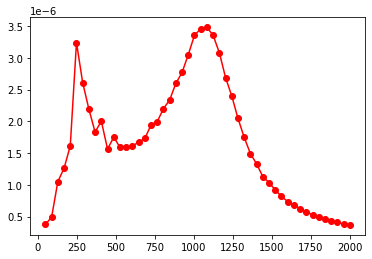

In [13]:
import matplotlib.pyplot as plt
plt.plot(data_T, data_CV, "ro-")